In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.optimize import nnls

In [2]:
def show_img(array, title=''):
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.imshow(array)
    plt.colorbar()

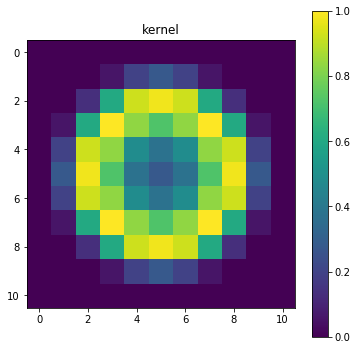

In [3]:
kernel_size = 11
sigma = 5
x, y = np.indices((kernel_size, kernel_size)) - kernel_size // 2
kernel = np.exp(-(x**2 + y**2 - 8)**2 / (2 * sigma**2))
show_img(kernel, 'kernel')

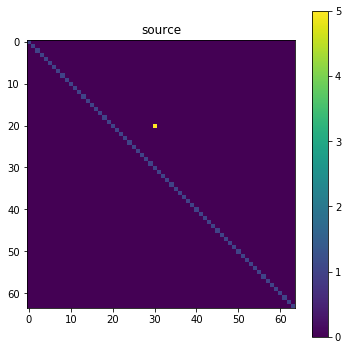

In [4]:
source = np.zeros((64, 64))
source[np.diag_indices(source.shape[0])] = 1.0
source[20, 30] = source[20, 30] = 5.0
show_img(source, 'source')

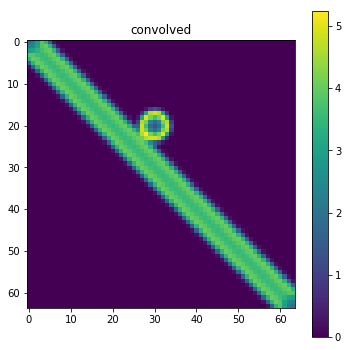

In [5]:
convolved = convolve(source, kernel, mode='same')
show_img(convolved, 'convolved')

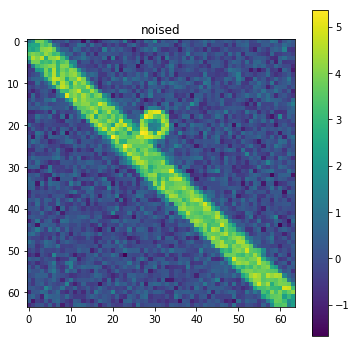

In [6]:
noised = convolved + np.random.normal(scale=0.5, size=source.shape)
show_img(noised, 'noised')

$$ \sum_{ij} K_{i-n,j-m} \cdot x_{ij} = b_{nm} $$

In [7]:
A = np.zeros(convolved.shape + source.shape)
b = noised.reshape(-1)

for c_idx in np.ndindex(convolved.shape):
    src = np.zeros_like(source)
    src[c_idx[0], c_idx[1]] = 1
    A[c_idx[0], c_idx[1]] = convolve(src, kernel, mode='same')
    
A = A.reshape(convolved.size, source.size)

## Метод наименьших квадратов

Измерений: $64 \times 64 = 4096$

Неизвестных: $64 \times 64 = 4096$

Матрица задачи: $4096 \times 4096$

In [8]:
x_ls, *_ = np.linalg.lstsq(A, b, rcond=None)

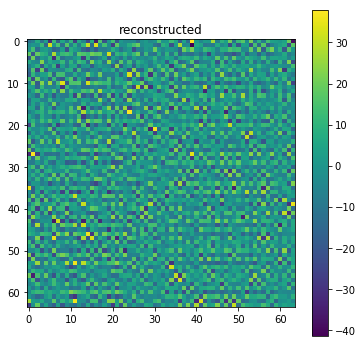

In [9]:
show_img(x_ls.reshape(source.shape), 'reconstructed')

In [10]:
residual = A @ x_ls - b

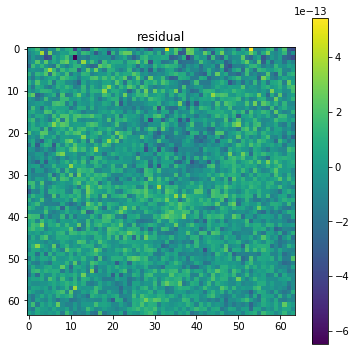

In [11]:
show_img(residual.reshape(source.shape), 'residual')

In [12]:
x_nnls, *_ = nnls(A, b)

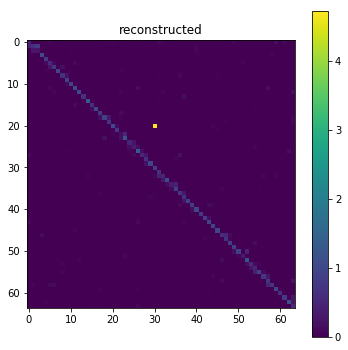

In [13]:
show_img(x_nnls.reshape(source.shape), 'reconstructed')

In [14]:
residual = A @ x_nnls - b

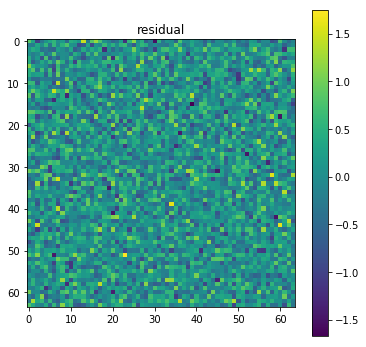

In [15]:
show_img(residual.reshape(source.shape), 'residual')